# Project 2

In [1]:
# Load libraries
import pandas as pd
import numpy
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from math import sqrt
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import plotly.figure_factory as ff

import csv
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get merged data
data_mergedtrain = pd.read_csv("merged_train.csv")
data_mergedtrain.head(3)

State    County  FIPS  Total Population  \
0    AZ    apache  4001             72346   
1    AZ   cochise  4003            128177   
2    AZ  coconino  4005            138064   

   Percent White, not Hispanic or Latino  \
0                              18.571863   
1                              56.299492   
2                              54.619597   

   Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
0                               0.486551                    5.947806   
1                               3.714395                   34.403208   
2                               1.342855                   13.711033   

   Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0              1.719515       50.598513                 45.854643   
1             11.458374       49.069646                 37.902276   
2              4.825298       50.581614                 48.946141   

   Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                 13.322091                    32460           15.807433   
1                 19.756275                    45383            8.567108   
2                 10.873943                    51106            8.238305   

   Percent Less than High School Degree  Percent Less than Bachelor's Degree  \
0                             21.758252                            88.941063   
1                             13.409171                            76.837055   
2                             11.085381                            65.791439   

   Percent Rural  Democratic  Republican  Party  
0      74.061076       16298        7810      1  
1      36.301067       17383       26929      0  
2      31.466066       34240       19249      1

**Task 01: (5 pts.) Partition the merged dataset into a training set and a validation set using the
holdout method or the cross-validation method. How did you partition the dataset?**

In [3]:
#task 1: Partition the merged dataset into a training set and a validation set using the holdout method.
#creating a training and validation set
x_train,x_val,y_train,y_val = train_test_split(data_mergedtrain[['Total Population',
                                                                     'Percent White, not Hispanic or Latino',
                                                                      'Percent Black, not Hispanic or Latino',
                                                                      'Percent Hispanic or Latino','Percent Foreign Born',
                                                                      'Percent Female', 'Percent Age 29 and Under',
                                                                      'Percent Age 65 and Older', 'Median Household Income',
                                                                      'Percent Unemployed', 'Percent Less than High School Degree',
                                                                      'Percent Less than Bachelor\'s Degree', 'Percent Rural']],
                                                   data_mergedtrain[['Democratic','Republican','Party']],test_size=0.25,random_state =0)


**Task 02: (5 pts.) Standardize the training set and the validation set.**

In [4]:
#task 2:  Standardize the training set and the validation set
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)


**Task 03: (25 pts.) Build a linear regression model to predict the number of votes cast for the Democratic party in each county. Consider multiple combinations of predictor variables. Compute evaluation metrics for the validation set and report your results. What is the best performing linear regression model? What is the performance of the model? How did you select the variables of the model?
• Repeat this task for the number of votes cast for the Republican party in each county.**

In [5]:
#task 3

#LINEAR REGRESSIONfor democratic party
LR_model = linear_model.LinearRegression().fit(X=x_train_scaled[:,[0,1,2,4,6,8,10,11,12]], y=y_train['Democratic'])

print()
print("Coefficients:")
print(LR_model.coef_)

print()
print("Intercept:")
print(LR_model.intercept_)


Coefficients:
[ 69908.65505722   1830.37860438   2307.30051784   2503.35963873
  -3766.69710289   1289.34667978   2692.06881351 -10326.83277279
   -171.67702553]

Intercept:
27569.373883928565


In [6]:
#task 3: evaluating the validation set for democratic party for LINEAR REGRESSION

LR_predicted = LR_model.predict(x_val_scaled[:,[0,1,2,4,6,8,10,11,12]])

R_squared = LR_model.score(X=x_val_scaled[:,[0,1,2,4,6,8,10,11,12]],y=y_val['Democratic'])
print('R sqaured')
print(R_squared)

Adjusted_R_squared = 1-(((1-R_squared)*(len(x_val_scaled)-1))/(len(x_val_scaled)-9))
print('Adjusted R squared')
print( Adjusted_R_squared)

RootMeanSquare = sqrt(mean_squared_error(y_val['Democratic'], LR_predicted))
print('Root Mean Square')
print(RootMeanSquare)

R sqaured
0.8857920013007843
Adjusted R squared
0.8826414358194266
Root Mean Square
13691.515239455384


In [7]:
#task 3: prediction for democratic using RIDGE REGRESSION

RIDGE_model = linear_model.Ridge(alpha = 1).fit(X=x_train_scaled[:,[0,1,2,4,6,8,10,11,12]], y=y_train['Democratic'])
print('Coefficient ',RIDGE_model.coef_)
print()
print()
print('Intercept',RIDGE_model.intercept_)


Coefficient  [ 69786.00776921   1826.73380191   2326.82743807   2572.80986389
  -3766.48461727   1285.17188978   2639.8540446  -10298.01716379
   -196.3968742 ]


Intercept 27569.373883928565


In [8]:
#task 3: evaluating the validation set for democratic party for RIDGE REGRESSION
RIDGE_predicted = RIDGE_model.predict(x_val_scaled[:,[0,1,2,4,6,8,10,11,12]])

R_squared = RIDGE_model.score(X=x_val_scaled[:,[0,1,2,4,6,8,10,11,12]],y=y_val['Democratic'])
print('R sqaured')
print(R_squared)

Adjusted_R_squared = 1-(((1-R_squared)*(len(x_val_scaled)-1))/(len(x_val_scaled)-9))
print('Adjusted R squared')
print( Adjusted_R_squared)

RootMeanSquare = sqrt(mean_squared_error(y_val['Democratic'], RIDGE_predicted))
print('Root Mean Square')
print(RootMeanSquare)

R sqaured
0.8858242606170862
Adjusted R squared
0.8826745850479024
Root Mean Square
13689.581442700883


In [9]:
#task 3: prediction for democratic using LASSO REGRESSION
LASSO_model = linear_model.Lasso(alpha = 1).fit(X=x_train_scaled[:,[0,1,2,4,6,8,10,11,12]], y=y_train['Democratic'])
print(LASSO_model.coef_)
print(LASSO_model.intercept_)


[ 69908.32365572   1824.93653144   2305.36232366   2502.38141147
  -3765.03732921   1288.18104901   2686.71459064 -10324.4038706
   -169.89839456]
27569.373883928565


In [10]:
#task 3: evaluating the validation set for democratic party for LASSO REGRESSION

LASSO_predicted = LASSO_model.predict(x_val_scaled[:,[0,1,2,4,6,8,10,11,12]])

R_squared = LASSO_model.score(X=x_val_scaled[:,[0,1,2,4,6,8,10,11,12]],y=y_val['Democratic'])
print('R sqaured')
print(R_squared)

Adjusted_R_squared = 1-(((1-R_squared)*(len(x_val_scaled)-1))/(len(x_val_scaled)-9))
print('Adjusted R squared')
print( Adjusted_R_squared)

RootMeanSquare = sqrt(mean_squared_error(y_val['Democratic'], LASSO_predicted))
print('Root Mean Square')
print(RootMeanSquare)

R sqaured
0.885827604553271
Adjusted R squared
0.8826780212306027
Root Mean Square
13689.380973572459


In [11]:
#task 3

#LINEAR REGRESSIONfor republican party
LR_model = linear_model.LinearRegression().fit(X=x_train_scaled[:,[0,1,2,4,6,8,10,11,12]], y=y_train['Republican'])

print()
print("Coefficients:")
print(LR_model.coef_)

print()
print("Intercept:")
print(LR_model.intercept_)



Coefficients:
[45223.82585833   282.41260658 -3604.73112339 -6344.826117
 -3239.76470254  4435.59710529  4011.74489074 -3360.34316285
 -6116.22628287]

Intercept:
21546.910714285706


In [12]:
#task 3: evaluating the validation set for republican party for LINEAR REGRESSION

LR_predicted = LR_model.predict(x_val_scaled[:,[0,1,2,4,6,8,10,11,12]])

R_squared = LR_model.score(X=x_val_scaled[:,[0,1,2,4,6,8,10,11,12]],y=y_val['Republican'])
print('R sqaured')
print(R_squared)

Adjusted_R_squared = 1-(((1-R_squared)*(len(x_val_scaled)-1))/(len(x_val_scaled)-9))
print('Adjusted R squared')
print( Adjusted_R_squared)

RootMeanSquare = sqrt(mean_squared_error(y_val['Republican'], LR_predicted))
print('Root Mean Square')
print(RootMeanSquare)

R sqaured
0.692376200465559
Adjusted R squared
0.6838900266852985
Root Mean Square
16175.406414309417


In [13]:
#task 3: prediction for republican using RIDGE REGRESSION

RIDGE_model = linear_model.Ridge(alpha = 1).fit(X=x_train_scaled[:,[0,1,2,4,6,8,10,11,12]], y=y_train['Republican'])
print('Coefficient ',RIDGE_model.coef_)
print()
print()
print('Intercept',RIDGE_model.intercept_)

Coefficient  [45135.50346327   302.07150389 -3573.90740717 -6255.8555961
 -3227.36233277  4413.50220457  3957.34616431 -3344.33816617
 -6108.28947836]


Intercept 21546.910714285706


In [14]:
#task 3: evaluating the validation set for republican party for RIDGE REGRESSION
RIDGE_predicted = RIDGE_model.predict(x_val_scaled[:,[0,1,2,4,6,8,10,11,12]])

R_squared = RIDGE_model.score(X=x_val_scaled[:,[0,1,2,4,6,8,10,11,12]],y=y_val['Republican'])
print('R sqaured')
print(R_squared)

Adjusted_R_squared = 1-(((1-R_squared)*(len(x_val_scaled)-1))/(len(x_val_scaled)-9))
print('Adjusted R squared')
print( Adjusted_R_squared)

RootMeanSquare = sqrt(mean_squared_error(y_val['Republican'], RIDGE_predicted))
print('Root Mean Square')
print(RootMeanSquare)

R sqaured
0.6924864462917757
Adjusted R squared
0.6840033137756867
Root Mean Square
16172.507693782147


In [15]:
#task 3: prediction for republican party using LASSO REGRESSION
LASSO_model = linear_model.Lasso(alpha = 1).fit(X=x_train_scaled[:,[0,1,2,4,6,8,10,11,12]], y=y_train['Republican'])
print(LASSO_model.coef_)
print(LASSO_model.intercept_)

[45221.18172144   282.31670392 -3601.97820678 -6337.17498069
 -3236.69791681  4432.94338974  4002.8747436  -3355.36219685
 -6112.76456802]
21546.910714285706


In [16]:
#task 3: evaluating the validation set for republicab party for LASSO REGRESSION

LASSO_predicted = LASSO_model.predict(x_val_scaled[:,[0,1,2,4,6,8,10,11,12]])

R_squared = LASSO_model.score(X=x_val_scaled[:,[0,1,2,4,6,8,10,11,12]],y=y_val['Republican'])
print('R sqaured')
print(R_squared)

Adjusted_R_squared = 1-(((1-R_squared)*(len(x_val_scaled)-1))/(len(x_val_scaled)-9))
print('Adjusted R squared')
print( Adjusted_R_squared)

RootMeanSquare = sqrt(mean_squared_error(y_val['Republican'], LASSO_predicted))
print('Root Mean Square')
print(RootMeanSquare)

R sqaured
0.6923897725320423
Adjusted R squared
0.6839039731536158
Root Mean Square
16175.049588678503


**Task 04: (25 pts.) Build a classification model to classify each county as Democratic or Republican. Consider at least two different classification techniques with multiple combinations of parameters and multiple combinations of variables. Compute evaluation metrics for the validation set and report your results. What is the best performing classification model? What is the performance of the model? How did you select the parameters of the model? How did you select the variables of the model?**

In [17]:
# Decision Tree Classifier - Select best parameters

# create pipeline with StandardScaler and DecisionTreeClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('dectree', DecisionTreeClassifier())
])

# set the possible parameter values for DecisionTreeClassifier
params = {'dectree__criterion' : ['entropy', 'gini'] , 'dectree__random_state' : range(0,11)}

# use GridSearchCV to standardize the data and build a model with parameters that give best score
gridsearch = GridSearchCV(estimator = pipe, param_grid = params, cv = 10, scoring = 'f1')
gridsearch.fit(x_train, y_train['Party'])
print("Decision Tree Classifier")
print("Best score found by GridSearchCV : ", gridsearch.best_score_)
print("Parameters of the Best score : ", gridsearch.best_params_)

# use the model on validation set to predict the values of Party 
y_pred = gridsearch.predict(x_val)
dectree_conf_matrix = metrics.confusion_matrix(y_val['Party'], y_pred)
print("\nConfusion matrix on validation set:\n", dectree_conf_matrix)

# evaluate the model on the predicted values of Party on validation set 
accuracy = metrics.accuracy_score(y_val['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Party'], y_pred, average = None)
recall = metrics.recall_score(y_val['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_val['Party'], y_pred, average = None)
print("\nEvaluation metrics using best parameters on the validation set : ")
print("\nAccuracy of validation set: ", accuracy)
print("Error  of validation set: ", error)
print("Precision  of validation set: ", precision)
print("Recall of validation set: ", recall)
print("F1_score of validation set:",F1_score)


Decision Tree Classifier
Best score found by GridSearchCV :  0.619369138416728
Parameters of the Best score :  {'dectree__criterion': 'entropy', 'dectree__random_state': 1}

Confusion matrix on validation set:
 [[192  30]
 [ 31  46]]

Evaluation metrics using best parameters on the validation set : 

Accuracy of validation set:  0.7959866220735786
Error  of validation set:  0.20401337792642138
Precision  of validation set:  [0.86098655 0.60526316]
Recall of validation set:  [0.86486486 0.5974026 ]
F1_score of validation set: [0.86292135 0.60130719]


In [18]:
# Decision Tree Classifier by filtering the variables

# set the filtered variables which we want to use to build the model.
variables = ['Total Population', 
        'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
        'Percent Foreign Born', 'Percent Female',
        'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree', 
        'Percent Less than Bachelor\'s Degree', 'Percent Rural']

# create pipeline with StandardScaler and DecisionTreeClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('dectree', DecisionTreeClassifier())
])

# set the possible parameter values for DecisionTreeClassifier
params = {'dectree__criterion' : ['entropy', 'gini'] , 'dectree__random_state' : range(0,11)}

# use GridSearchCV to standardize the data and build a model with parameters that give best score
gridsearch = GridSearchCV(estimator = pipe, param_grid = params, cv = 10, scoring = 'f1')
gridsearch.fit(x_train[variables], y_train['Party'])
print("Decision Tree Classifier with filtered variables")
print("Best score found by GridSearchCV : ", gridsearch.best_score_)
print("Parameters of the Best score : ", gridsearch.best_params_)

# use the model on validation set to predict the values of Party 
y_pred = gridsearch.predict(x_val[variables])
dectree_conf_matrix = metrics.confusion_matrix(y_val['Party'], y_pred)
print("\nConfusion matrix on validation set:\n", dectree_conf_matrix)

# evaluate the model on the predicted values of Party on validation set
accuracy = metrics.accuracy_score(y_val['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Party'], y_pred, average = None)
recall = metrics.recall_score(y_val['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_val['Party'], y_pred, average = None)
print("\nEvaluation metrics using best parameters on the validation set : ")
print("\nAccuracy of validation set: ", accuracy)
print("Error  of validation set: ", error)
print("Precision  of validation set: ", precision)
print("Recall of validation set: ", recall)
print("F1_score of validation set:",F1_score)


Decision Tree Classifier with filtered variables
Best score found by GridSearchCV :  0.5894992980825718
Parameters of the Best score :  {'dectree__criterion': 'entropy', 'dectree__random_state': 7}

Confusion matrix on validation set:
 [[192  30]
 [ 27  50]]

Evaluation metrics using best parameters on the validation set : 

Accuracy of validation set:  0.8093645484949833
Error  of validation set:  0.1906354515050167
Precision  of validation set:  [0.87671233 0.625     ]
Recall of validation set:  [0.86486486 0.64935065]
F1_score of validation set: [0.8707483  0.63694268]


In [19]:
# K Nearest Neighbors Classifier - Select best parameters

# create pipeline with StandardScaler and KNeighborsClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])

# set the possible parameter values for KNeighborsClassifier
params = {'knn__n_neighbors' : range(1,31)}

# use GridSearchCV to standardize the data and build a model with parameters that give best score
gridsearch = GridSearchCV(estimator = pipe, param_grid = params, cv = 10, scoring = 'f1')
gridsearch.fit(x_train, y_train['Party'])
print("K Nearest Neighbors Classifier")
print("Best score found by GridSearchCV : ", gridsearch.best_score_)
print("Parameters of the Best score : ", gridsearch.best_params_)

# use the model on validation set to predict the values of Party 
y_pred = gridsearch.predict(x_val)
knn_conf_matrix = metrics.confusion_matrix(y_val['Party'], y_pred)
print("\nConfusion matrix on validation set:\n", knn_conf_matrix)

# evaluate the model on the predicted values of Party on validation set
accuracy = metrics.accuracy_score(y_val['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Party'], y_pred, average = None)
recall = metrics.recall_score(y_val['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_val['Party'], y_pred, average = None)
print("\nEvaluation metrics using best parameters on the validation set : ")
print("\nAccuracy of validation set: ", accuracy)
print("Error  of validation set: ", error)
print("Precision  of validation set: ", precision)
print("Recall of validation set: ", recall)
print("F1_score of validation set:",F1_score)


K Nearest Neighbors Classifier
Best score found by GridSearchCV :  0.6488895674315595
Parameters of the Best score :  {'knn__n_neighbors': 5}

Confusion matrix on validation set:
 [[206  16]
 [ 45  32]]

Evaluation metrics using best parameters on the validation set : 

Accuracy of validation set:  0.7959866220735786
Error  of validation set:  0.20401337792642138
Precision  of validation set:  [0.82071713 0.66666667]
Recall of validation set:  [0.92792793 0.41558442]
F1_score of validation set: [0.87103594 0.512     ]


In [20]:
# K Nearest Neighbors Classifier by filtering the variables

# set the filtered variables which we want to use to build the model.
variables = ['Total Population', 
        'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
        'Percent Foreign Born', 'Percent Female',  'Percent Age 65 and Older', 
        'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree', 
        'Percent Less than Bachelor\'s Degree', 'Percent Rural']

# create pipeline with StandardScaler and KNeighborsClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
])

# set the possible parameter values for KNeighborsClassifier
params = {'knn__n_neighbors' : range(1,31)}

# use GridSearchCV to standardize the data and build a model with parameters that give best score
gridsearch = GridSearchCV(estimator = pipe, param_grid = params, cv = 10, scoring = 'f1')
gridsearch.fit(x_train[variables], y_train['Party'])
print("K Nearest Neighbors Classifier with filtered variables")
print("Best score found by GridSearchCV : ", gridsearch.best_score_)
print("Parameters of the Best score : ", gridsearch.best_params_)

# use the model on validation set to predict the values of Party 
y_pred = gridsearch.predict(x_val[variables])
knn_conf_matrix = metrics.confusion_matrix(y_val['Party'], y_pred)
print("\nConfusion matrix on validation set:\n", knn_conf_matrix)

# evaluate the model on the predicted values of Party on validation set
accuracy = metrics.accuracy_score(y_val['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Party'], y_pred, average = None)
recall = metrics.recall_score(y_val['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_val['Party'], y_pred, average = None)
print("\nEvaluation metrics using best parameters on the validation set : ")
print("\nAccuracy of validation set: ", accuracy)
print("Error  of validation set: ", error)
print("Precision  of validation set: ", precision)
print("Recall of validation set: ", recall)
print("F1_score of validation set:",F1_score)


K Nearest Neighbors Classifier with filtered variables
Best score found by GridSearchCV :  0.6219982896115672
Parameters of the Best score :  {'knn__n_neighbors': 5}

Confusion matrix on validation set:
 [[207  15]
 [ 39  38]]

Evaluation metrics using best parameters on the validation set : 

Accuracy of validation set:  0.8193979933110368
Error  of validation set:  0.1806020066889632
Precision  of validation set:  [0.84146341 0.71698113]
Recall of validation set:  [0.93243243 0.49350649]
F1_score of validation set: [0.88461538 0.58461538]


In [21]:
# SVM Classifier - Select best parameters

# create pipeline with StandardScaler and SVC
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC())
])

# set the possible parameter values for SVC
params = {'svc__kernel':['linear','rbf','poly']}

# use GridSearchCV to standardize the data and build a model with parameters that give best score
gridsearch = GridSearchCV(estimator = pipe, param_grid = params, cv = 10, scoring = 'f1')
gridsearch.fit(x_train, y_train['Party'])
print("SVM Classifier")
print("Best score found by GridSearchCV : ", gridsearch.best_score_)
print("Parameters of the Best score : ", gridsearch.best_params_)

# use the model on validation set to predict the values of Party 
y_pred = gridsearch.predict(x_val)
svm_conf_matrix = metrics.confusion_matrix(y_val['Party'], y_pred)
print("\nConfusion matrix on validation set:\n", svm_conf_matrix)

# evaluate the model on the predicted values of Party on validation set
accuracy = metrics.accuracy_score(y_val['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Party'], y_pred, average = None)
recall = metrics.recall_score(y_val['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_val['Party'], y_pred, average = None)
print("\nEvaluation metrics using best parameters on the validation set : ")
print("\nAccuracy of validation set: ", accuracy)
print("Error  of validation set: ", error)
print("Precision  of validation set: ", precision)
print("Recall of validation set: ", recall)
print("F1_score of validation set:",F1_score)


SVM Classifier
Best score found by GridSearchCV :  0.6353200382676392
Parameters of the Best score :  {'svc__kernel': 'rbf'}

Confusion matrix on validation set:
 [[216   6]
 [ 37  40]]

Evaluation metrics using best parameters on the validation set : 

Accuracy of validation set:  0.8561872909698997
Error  of validation set:  0.14381270903010035
Precision  of validation set:  [0.85375494 0.86956522]
Recall of validation set:  [0.97297297 0.51948052]
F1_score of validation set: [0.90947368 0.6504065 ]


In [22]:
# SVM Classifier by filtering the variables

# set the filtered variables which we want to use to build the model.
variables = ['Total Population', 
        'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
        'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 
        'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree', 
        'Percent Less than Bachelor\'s Degree', 'Percent Rural']

# create pipeline with StandardScaler and SVC
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC())
])

# set the possible parameter values for SVC
params = {'svc__kernel':['linear','rbf','poly']}

# use GridSearchCV to standardize the data and build a model with parameters that give best score
gridsearch = GridSearchCV(estimator = pipe, param_grid = params, cv = 10, scoring = 'f1')
gridsearch.fit(x_train[variables], y_train['Party'])
print("SVM Classifier with filtered variables")
print("Best score found by GridSearchCV : ", gridsearch.best_score_)
print("Parameters of the Best score : ", gridsearch.best_params_)

# use the model on validation set to predict the values of Party 
y_pred = gridsearch.predict(x_val[variables])
svm_conf_matrix = metrics.confusion_matrix(y_val['Party'], y_pred)
print("\nConfusion matrix on validation set:\n", svm_conf_matrix)

# evaluate the model on the predicted values of Party on validation set
accuracy = metrics.accuracy_score(y_val['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Party'], y_pred, average = None)
recall = metrics.recall_score(y_val['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_val['Party'], y_pred, average = None)
print("\nEvaluation metrics using best parameters on the validation set : ")
print("\nAccuracy of validation set: ", accuracy)
print("Error  of validation set: ", error)
print("Precision  of validation set: ", precision)
print("Recall of validation set: ", recall)
print("F1_score of validation set:",F1_score)

SVM Classifier with filtered variables
Best score found by GridSearchCV :  0.644910926535622
Parameters of the Best score :  {'svc__kernel': 'rbf'}

Confusion matrix on validation set:
 [[215   7]
 [ 36  41]]

Evaluation metrics using best parameters on the validation set : 

Accuracy of validation set:  0.8561872909698997
Error  of validation set:  0.14381270903010035
Precision  of validation set:  [0.85657371 0.85416667]
Recall of validation set:  [0.96846847 0.53246753]
F1_score of validation set: [0.90909091 0.656     ]


In [23]:
# Random forest classifier

# set the filtered variables which we want to use to build the model.
variables = ['Total Population', 
        'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
        'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 
        'Median Household Income',  'Percent Less than High School Degree', 
        'Percent Less than Bachelor\'s Degree', 'Percent Rural']

# create pipeline with StandardScaler and RandomForestClassifier
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('randforest', RandomForestClassifier())
])

# set the possible parameter values for RandomForestClassifier
params = {'randforest__n_estimators' : [10],
          'randforest__criterion': ['entropy'],
          'randforest__random_state' : [0]}

# use GridSearchCV to standardize the data and build a model with parameters that give best score
gridsearch = GridSearchCV(estimator = pipe, param_grid = params, cv = 10, scoring = 'f1')
gridsearch.fit(x_train[variables], y_train['Party'])
print("Random forest classifier")
print("Best score found by GridSearchCV : ", gridsearch.best_score_)
print("Parameters of the Best score : ", gridsearch.best_params_)

# use the model on validation set to predict the values of Party 
y_pred = gridsearch.predict(x_val[variables])
randforest_conf_matrix = metrics.confusion_matrix(y_val['Party'], y_pred)
print("\nConfusion matrix on validation set:\n", randforest_conf_matrix)

# evaluate the model on the predicted values of Party on validation set
accuracy = metrics.accuracy_score(y_val['Party'], y_pred)
error = 1 - accuracy
precision = metrics.precision_score(y_val['Party'], y_pred, average = None)
recall = metrics.recall_score(y_val['Party'], y_pred, average = None)
F1_score = metrics.f1_score(y_val['Party'], y_pred, average = None)
print("\nEvaluation metrics using best parameters on the validation set : ")
print("\nAccuracy of validation set: ", accuracy)
print("Error  of validation set: ", error)
print("Precision  of validation set: ", precision)
print("Recall of validation set: ", recall)
print("F1_score of validation set:",F1_score)


Random forest classifier
Best score found by GridSearchCV :  0.6274414676622195
Parameters of the Best score :  {'randforest__criterion': 'entropy', 'randforest__n_estimators': 10, 'randforest__random_state': 0}

Confusion matrix on validation set:
 [[211  11]
 [ 37  40]]

Evaluation metrics using best parameters on the validation set : 

Accuracy of validation set:  0.8394648829431438
Error  of validation set:  0.1605351170568562
Precision  of validation set:  [0.85080645 0.78431373]
Recall of validation set:  [0.95045045 0.51948052]
F1_score of validation set: [0.89787234 0.625     ]


**Task 05: (25 pts.) Build a clustering model to cluster the counties. Consider at least two different clustering techniques with multiple combinations of parameters and multiple combinations of variables. Compute unsupervised and supervised evaluation metrics for the validation set with the party of the counties (Democratic or Republican) as the true cluster and report your results. What is the best performing clustering model? What is the performance of the model? How did you select the parameters of model? How did you select the variables of the model?**

In [24]:
# Partition the dataset into attributes and true clusters (Democratic/Republican)
X_Clusters = data_mergedtrain[['Total Population',
                      'Percent White, not Hispanic or Latino',
                      'Percent Black, not Hispanic or Latino',
                      'Percent Hispanic or Latino','Percent Foreign Born',
                      'Percent Female', 'Percent Age 29 and Under',
                      'Percent Age 65 and Older', 'Median Household Income',
                      'Percent Unemployed', 'Percent Less than High School Degree',
                      'Percent Less than Bachelor\'s Degree', 'Percent Rural']]
                      #'Democratic','Republican']]
Y_Clusters = data_mergedtrain['Party']

In [25]:
scalerClusters = StandardScaler()
scalerClusters.fit(X_Clusters)
X_scaledClusters = scalerClusters.transform(X_Clusters)

##Function to plot contingency matrixes
def plotClusters(title_arr,cont_matrix, rand_i,  sil_h, hom, compl):
    fig, ax = plt.subplots(1,len(cont_matrix) ,figsize=(15,15))
    plt.subplots_adjust( 
                    wspace = 0.8,  # the amount of width reserved for space between subplots,
                                  # expressed as a fraction of the average axis width
                    hspace = 0.2)  # the amount of height reserved for space between subplots,
                                  # expressed as a fraction of the average axis height)
#     print(ax[0][0])
#     print("\n\n___\n")
#     print(ax[1][0])
    index = 0
    for tmp in ax :
        tmp.title.set_text(title_arr[index])
        sns.heatmap(cont_matrix[index], annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues, ax=tmp, cbar_kws = dict(orientation ='horizontal',use_gridspec=False))
        tmp.set_xlabel( 'Predicted\n' + 'Adjusted Rand Index: ' + str(rand_i[index]) + '\nSilhouette Coef: ' + str(sil_h[index]) 
                       + '\nHomogeneity: ' + str(hom[index]) + '\nCompleteness: ' + str(compl[index]) )
        tmp.set_ylabel('Actual')
        index = index + 1
#     index = 0
#     for tmp in ax[1]:
#         print(tmp)
#         tmp.table(cellText=[title_arr[i:i+1] for i in  range(0, len(title_arr), 1)], cellColours=None, cellLoc='right', colWidths=None, rowLabels=None, 
#                   rowColours=None, rowLoc='left', colLabels=None, colColours=None, colLoc='center', loc='bottom', bbox=None, edges='closed'   )
#         #index = index + 1
        
    
    

### Hierarchical Single

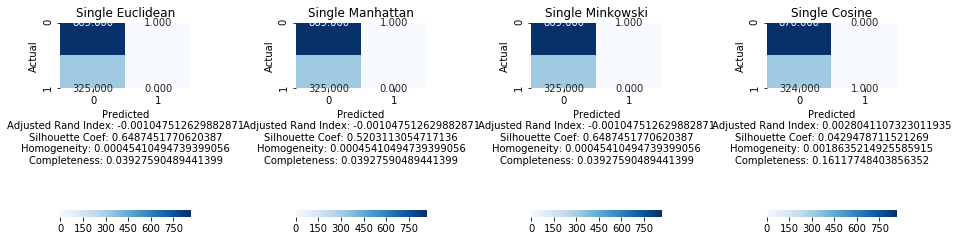

In [26]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#Hierarchical Single - Euclidean (All Variables)
clustering = linkage(X_scaledClusters, method='single', metric = 'euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("Single Euclidean")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Single - Manhattan (All Variables)
clustering = linkage(X_scaledClusters, method='single', metric = 'cityblock')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='cityblock')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("Single Manhattan")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Single - Minkowski (All Variables)
clustering = linkage(X_scaledClusters, method='single', metric = 'minkowski')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='minkowski')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("Single Minkowski")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Single - Cosine (All Variables)
clustering = linkage(X_scaledClusters, method='single', metric = 'cosine')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='cosine')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("Single Cosine")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)



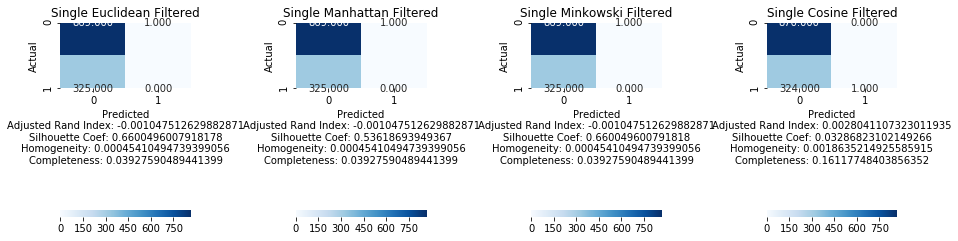

In [27]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []
var = ['Total Population', 
        'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
        'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 
        'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree', 
        'Percent Less than Bachelor\'s Degree', 'Percent Rural']

scalerClustersFiltered = StandardScaler()
scalerClustersFiltered.fit(X_Clusters[var])
x_scaled_filtered = scalerClustersFiltered.transform(X_Clusters[var])

#Hierarchical Single - Euclidean (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='single', metric = 'euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("Single Euclidean Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Single - Manhattan (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='single', metric = 'cityblock')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='cityblock')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("Single Manhattan Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Single - Minkowski (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='single', metric = 'minkowski')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='minkowski')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("Single Minkowski Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Single - Cosine (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='single', metric = 'cosine')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='cosine')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("Single Cosine Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

### Hierarchical Complete

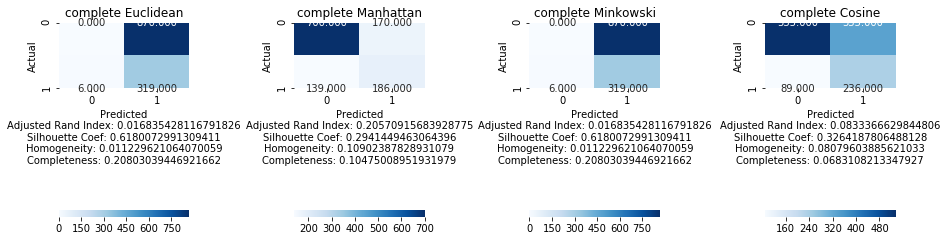

In [28]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#Hierarchical Complete - Euclidean (All Variables)
clustering = linkage(X_scaledClusters, method='complete', metric = 'euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("complete Euclidean")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Complete - Manhattan (All Variables)
clustering = linkage(X_scaledClusters, method='complete', metric = 'cityblock')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='cityblock')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("complete Manhattan")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Complete - Minkowski (All Variables)
clustering = linkage(X_scaledClusters, method='complete', metric = 'minkowski')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='minkowski')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("complete Minkowski")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Complete - Cosine (All Variables)
clustering = linkage(X_scaledClusters, method='complete', metric = 'cosine')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='cosine')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("complete Cosine")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

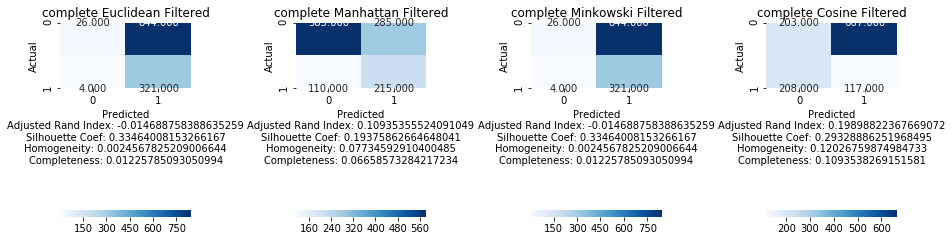

In [29]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#Hierarchical Complete - Euclidean (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='complete', metric = 'euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("complete Euclidean Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Complete - Manhattan (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='complete', metric = 'cityblock')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='cityblock')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("complete Manhattan Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Complete - Minkowski (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='complete', metric = 'minkowski')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='minkowski')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("complete Minkowski Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Complete - Cosine (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='complete', metric = 'cosine')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='cosine')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("complete Cosine Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

### Hierarchical Average

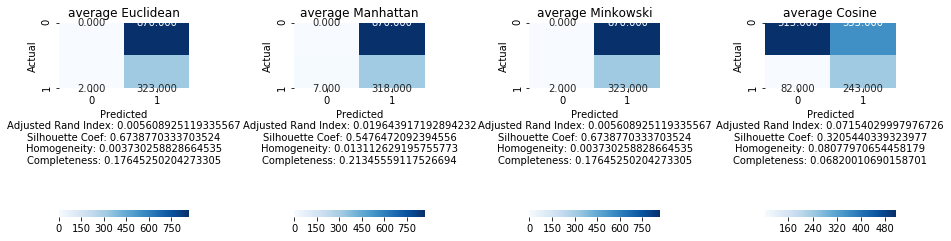

In [30]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#Hierarchical Average - Euclidean (All Variables)
clustering = linkage(X_scaledClusters, method='average', metric = 'euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("average Euclidean")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Average - Manhattan (All Variables)
clustering = linkage(X_scaledClusters, method='average', metric = 'cityblock')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='cityblock')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("average Manhattan")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Average - Minkowski (All Variables)
clustering = linkage(X_scaledClusters, method='average', metric = 'minkowski')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='minkowski')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("average Minkowski")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Average - Cosine (All Variables)
clustering = linkage(X_scaledClusters, method='average', metric = 'cosine')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='cosine')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("average Cosine")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

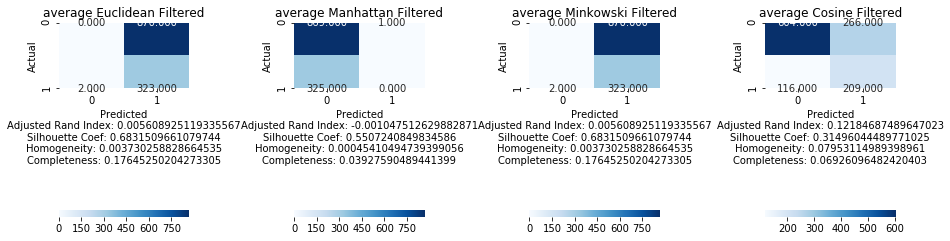

In [31]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#Hierarchical Average - Euclidean (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='average', metric = 'euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("average Euclidean Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Average - Manhattan (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='average', metric = 'cityblock')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='cityblock')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("average Manhattan Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#Hierarchical Average - Minkowski (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='average', metric = 'minkowski')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='minkowski')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("average Minkowski Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))


#Hierarchical Average - Minkowski (Filtered Variables)
clustering = linkage(x_scaled_filtered, method='average', metric = 'cosine')
clusters = fcluster(clustering, 2, criterion = 'maxclust')
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='cosine')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("average Cosine Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

### K-Means

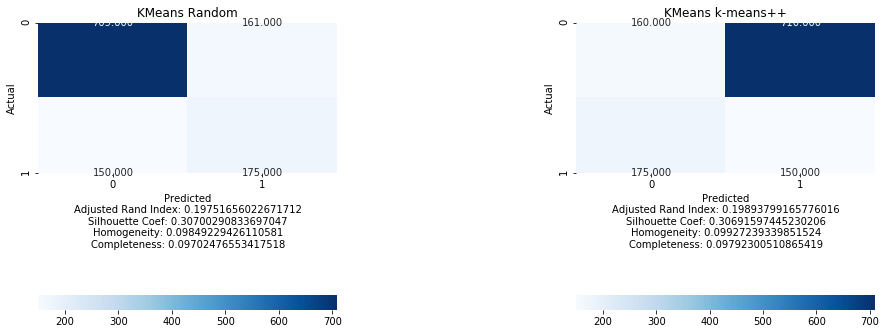

In [32]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#KMeans
clustering = KMeans(n_clusters = 2, init ='random', n_init = 10, random_state = 0).fit(X_scaledClusters)
clusters = clustering.labels_
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("KMeans Random")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

clustering = KMeans(n_clusters = 2, init ='k-means++', n_init = 10, random_state = 0).fit(X_scaledClusters)
clusters = clustering.labels_
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("KMeans k-means++")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

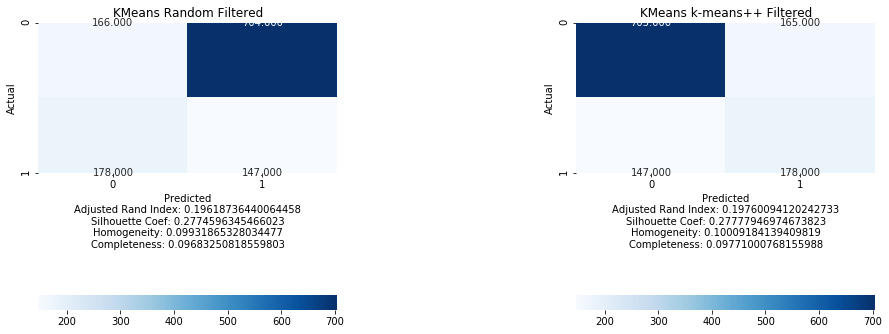

In [33]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#KMeans Filtered
clustering = KMeans(n_clusters = 2, init ='random', n_init = 10, random_state = 0).fit(x_scaled_filtered)
clusters = clustering.labels_
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("KMeans Random Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#KMEANS Filtered
clustering = KMeans(n_clusters = 2, init ='k-means++', n_init = 10, random_state = 0).fit(x_scaled_filtered)
clusters = clustering.labels_
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("KMeans k-means++ Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

### DBSCAN

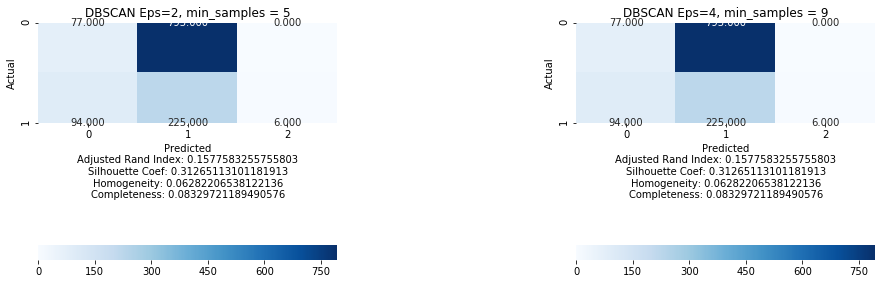

In [34]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#DBSCAN
clustering = DBSCAN(eps = 2, min_samples = 5, metric = 'euclidean').fit(X_scaledClusters)
clusters = clustering.labels_
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("DBSCAN Eps=2, min_samples = 5")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#DBSCAN
clustering = DBSCAN(eps = 2, min_samples = 5, metric = 'euclidean').fit(X_scaledClusters)
clusters = clustering.labels_
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaledClusters, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("DBSCAN Eps=4, min_samples = 9")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))


plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

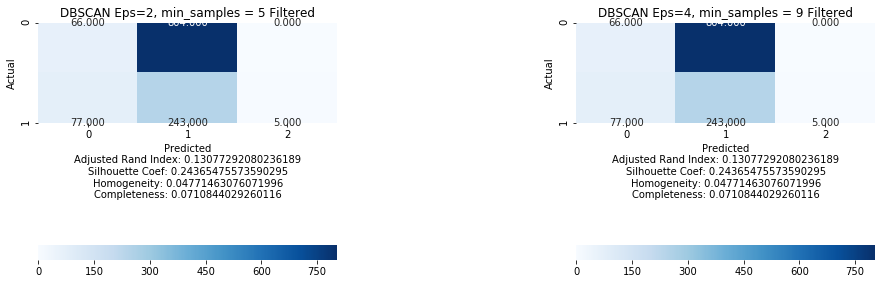

In [35]:
titles = []
cont_matrix_arr = []
sil_h_arr = []
adj_rand_i_arr = []
homog_arr = []
completeness_arr = []

#DBSCAN Filtered
clustering = DBSCAN(eps = 2, min_samples = 5, metric = 'euclidean').fit(x_scaled_filtered)
clusters = clustering.labels_
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("DBSCAN Eps=2, min_samples = 5 Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))

#DBSCAN Filtered
clustering = DBSCAN(eps = 2, min_samples = 5, metric = 'euclidean').fit(x_scaled_filtered)
clusters = clustering.labels_
cont_matrix = metrics.cluster.contingency_matrix(Y_Clusters, clusters)
adjusted_rand_index = metrics.adjusted_rand_score(Y_Clusters, clusters)
silhouette_coefficient = metrics.silhouette_score(x_scaled_filtered, clusters, metric='euclidean')
#print([adjusted_rand_index, silhouette_coefficient])
titles.append("DBSCAN Eps=4, min_samples = 9 Filtered")
cont_matrix_arr.append(cont_matrix)
sil_h_arr.append(silhouette_coefficient)
adj_rand_i_arr.append(adjusted_rand_index)
homog_arr.append(metrics.homogeneity_score(Y_Clusters, clusters) )
completeness_arr.append(metrics.completeness_score(Y_Clusters, clusters))


plotClusters(titles,cont_matrix_arr,adj_rand_i_arr, sil_h_arr,homog_arr,completeness_arr)

### True Clusters

In [36]:
silhouette_coefficient = metrics.silhouette_score(X_Clusters, Y_Clusters, metric='euclidean')
print(silhouette_coefficient)

0.41499612317195983


**Task 06: (10 pts.) Create a map of Democratic counties and Republican counties using the counties’ FIPS codes and Python’s Plotly library (plot.ly/python/county-choropleth/). Compare with the map of Democratic counties and Republican counties created in Project 01. What conclusions do you make from the plots?**

In [37]:
columns = x_train.columns
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=columns)
x_val_scaled_df = pd.DataFrame(x_val_scaled, columns=columns)
x = data_mergedtrain.iloc[:, 2:16]
y = data_mergedtrain[['Democratic','Republican','Party']]

In [38]:
# Predict Party values for all the merged data using the best classifier

# variables selected for classifier
variables = ['Total Population', 
        'Percent White, not Hispanic or Latino', 'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
        'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 
        'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree', 
        'Percent Less than Bachelor\'s Degree', 'Percent Rural']

# standaridize the entire merged data
scaler = StandardScaler()
columns = x_train[variables].columns
scaler.fit(x_train[variables])
x_train_scaled = scaler.transform(x_train[variables])
x_merged_scaled = scaler.transform(x[variables])

# using the best classifier(SVC) to predict Party for the entire merged data
classifier = SVC(kernel = 'rbf') 
classifier.fit(x_train_scaled, y_train['Party'])

y_pred_party = classifier.predict(x_merged_scaled)
svm_conf_matrix = metrics.confusion_matrix(y['Party'], y_pred_party)
print("\nConfusion matrix:\n", svm_conf_matrix)

# evaluation of the above classifier used to predict Party for the entire merged data
accuracy = metrics.accuracy_score(y['Party'], y_pred_party)
error = 1 - accuracy
precision = metrics.precision_score(y['Party'], y_pred_party, average = None)
recall = metrics.recall_score(y['Party'], y_pred_party, average = None)
F1_score = metrics.f1_score(y['Party'], y_pred_party, average = None)
print("\nAccuracy: ", accuracy)
print("Error: ", error)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score:",F1_score)

# new dataframe(X_merged_predicted) with know Party values and predicted Party values
X_merged_predicted = pd.DataFrame(x) 

X_merged_predicted['Party'] = y['Party']
X_merged_predicted['Party_pred'] = y_pred_party
X_merged_predicted.head(5)



Confusion matrix:
 [[844  26]
 [140 185]]

Accuracy:  0.8610878661087866
Error:  0.13891213389121337
Precision:  [0.85772358 0.87677725]
Recall:  [0.97011494 0.56923077]
F1_score: [0.91046386 0.69029851]


FIPS  Total Population  Percent White, not Hispanic or Latino  \
0  4001             72346                              18.571863   
1  4003            128177                              56.299492   
2  4005            138064                              54.619597   
3  4007             53179                              63.222325   
4  4009             37529                              51.461536   

   Percent Black, not Hispanic or Latino  Percent Hispanic or Latino  \
0                               0.486551                    5.947806   
1                               3.714395                   34.403208   
2                               1.342855                   13.711033   
3                               0.552850                   18.548675   
4                               1.811932                   32.097844   

   Percent Foreign Born  Percent Female  Percent Age 29 and Under  \
0              1.719515       50.598513                 45.854643   
1             11.458374       49.069646                 37.902276   
2              4.825298       50.581614                 48.946141   
3              4.249798       50.296170                 32.238290   
4              4.385942       46.313518                 46.393456   

   Percent Age 65 and Older  Median Household Income  Percent Unemployed  \
0                 13.322091                    32460           15.807433   
1                 19.756275                    45383            8.567108   
2                 10.873943                    51106            8.238305   
3                 26.397638                    40593           12.129932   
4                 12.315809                    47422           14.424104   

   Percent Less than High School Degree  Percent Less than Bachelor's Degree  \
0                             21.758252                            88.941063   
1                             13.409171                            76.837055   
2                             11.085381                            65.791439   
3                             15.729958                            82.262624   
4                             14.580797                            86.675944   

   Percent Rural  Party  Party_pred  
0      74.061076      1           1  
1      36.301067      0           0  
2      31.466066      1           1  
3      41.062000      0           0  
4      46.437399      0           0

In [43]:
# Map of democratic and republican counties using Party from the merged set (Project1)

fips1 = data_mergedtrain['FIPS'].tolist()
values = data_mergedtrain['Party'].tolist()
colorscale = ['rgb(244,109,67)', 'rgb(49,54,149)']
fig1 = ff.create_choropleth(
    colorscale=colorscale,
    fips=fips1, values=values,
    title='Counties by Democratic/Republican',
    legend_title='1 = Democratic Counties, 0 = Republican Counties'
)
fig1.layout.template = None
fig1.show(sort=True)

In [40]:
# Map of democratic and republican counties using Party_pred predicted using the best classifier(SVM)

fips2 = X_merged_predicted['FIPS'].tolist()
pred_values = X_merged_predicted['Party_pred'].tolist()
colorscale = ['rgb(244,109,67)', 'rgb(49,54,149)']
fig2 = ff.create_choropleth(
    colorscale=colorscale,
    fips=fips2, values=pred_values,
    title='Counties by Democratic/Republican',
    legend_title='1 = Democratic Counties, 0 = Republican Counties'
)
fig2.layout.template = None
fig2.show(sort=True)

**Task 07: (5 pts.) Use your best performing regression and classification models to predict the number of votes cast for the Democratic party in each county, the number of votes cast for the Republican party in each county, and the party (Democratic or Republican) of each county for the test dataset (demographics_test.csv). Save the output in a single CSV file. For the expected format of the output, see sample_output.csv.**

In [41]:
data_test = pd.read_csv("demographics_test.csv")
data_test.head(3)

x_test = data_test[['Total Population',
                                                                     'Percent White, not Hispanic or Latino',
                                                                      'Percent Black, not Hispanic or Latino',
                                                                      'Percent Hispanic or Latino','Percent Foreign Born',
                                                                      'Percent Female', 'Percent Age 29 and Under',
                                                                      'Percent Age 65 and Older', 'Median Household Income',
                                                                      'Percent Unemployed', 'Percent Less than High School Degree',
                                                                      'Percent Less than Bachelor\'s Degree', 'Percent Rural']]

#select variables 
# variables = ['Total Population', 
#         'Percent Black, not Hispanic or Latino', 'Percent Hispanic or Latino',
#         'Percent Foreign Born', 'Percent Female', 'Percent Age 29 and Under', 'Percent Age 65 and Older', 
#         'Median Household Income', 'Percent Unemployed', 'Percent Less than High School Degree', 
#         'Percent Less than Bachelor\'s Degree', 'Percent Rural']

# SVM Classifier - Select best parameters
# create pipeline with StandardScaler and SVC
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('svc', SVC())
])
# set the possible parameter values for SVC
params = {'svc__kernel':['linear','rbf','poly']}
# use GridSearchCV to standardize the data and build a model with parameters that give best score
bestClassification = GridSearchCV(estimator = pipe, param_grid = params, cv = 10, scoring = 'f1')
bestClassification.fit(x_train, y_train['Party'])
#print(bestClassification.best_params_)
party_predClass = bestClassification.predict(x_test)



x_test_scaled = scaler.transform(x_test)
LASSO_modelDem = linear_model.Lasso(alpha = 1).fit(X=x_train_scaled[:,[0,1,2,4,6,8,10,11,12]], y=y_train['Democratic'])
LASSO_DemVotes = LASSO_modelDem.predict(x_test_scaled[:,[0,1,2,4,6,8,10,11,12]])

RIDGE_modelRep = linear_model.Ridge(alpha = 1).fit(X=x_train_scaled[:,[0,1,2,4,6,8,10,11,12]], y=y_train['Republican'])
RIDGE_RepVotes = RIDGE_modelRep.predict(x_test_scaled[:,[0,1,2,4,6,8,10,11,12]])

results  = pd.DataFrame({'State':data_test['State'] ,'County':data_test['County'] ,'Democratic': LASSO_DemVotes, 'Republican': RIDGE_RepVotes,'Party':party_predClass }, columns=['State','County', 'Democratic', 'Republican', 'Party'])
#print(results.head())

numeric_results= results._get_numeric_data()
numeric_results[numeric_results < 0] = 0
#print(results.head())


import os, errno
try:
    os.remove('classifier_results.csv')
except OSError:
    pass

with open('classifier_results.csv', 'w') as file:
    filewriter = csv.writer(file, delimiter=',',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['State', 'County','Democratic', 'Republican', 'Party'])
    for index, row in results.iterrows():
        filewriter.writerow([row['State'],row['County'], row['Democratic'], row['Republican'], row['Party']])
        
            
